
# <u><b>About Research</b></u>
- Identify market regime using K-Means Clustering


## Identify Regimes: K-Means Clustering
- K-Means clustering identified 4 regimes
    - Regime 0 (Fear)
    - Regime 1 (Recovery)
    - Regime 2 (Bull Weakening)
    - Regime 3 (Bear Developing)
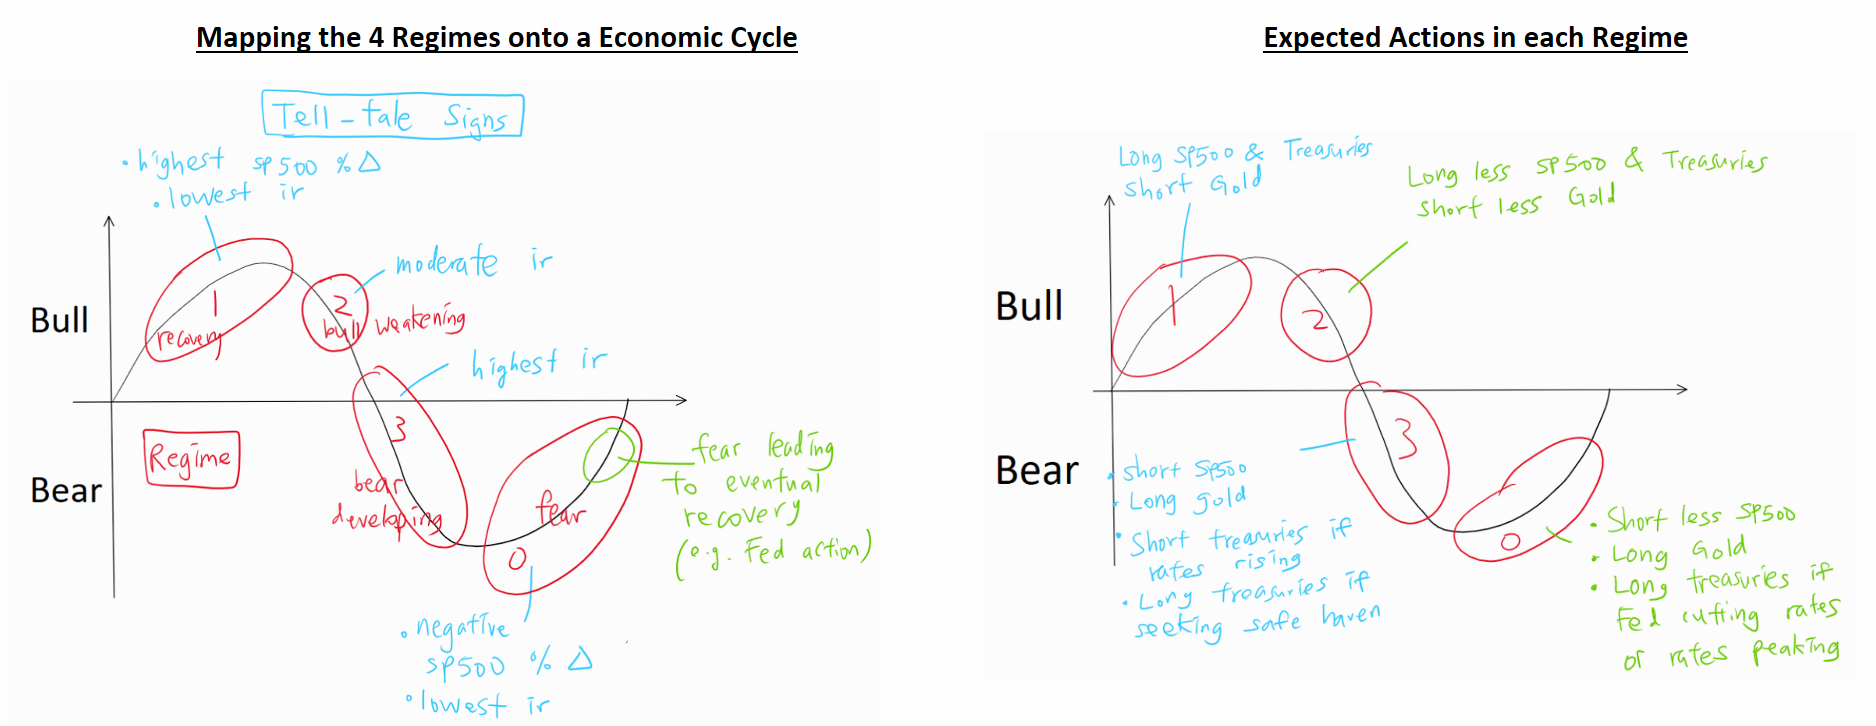
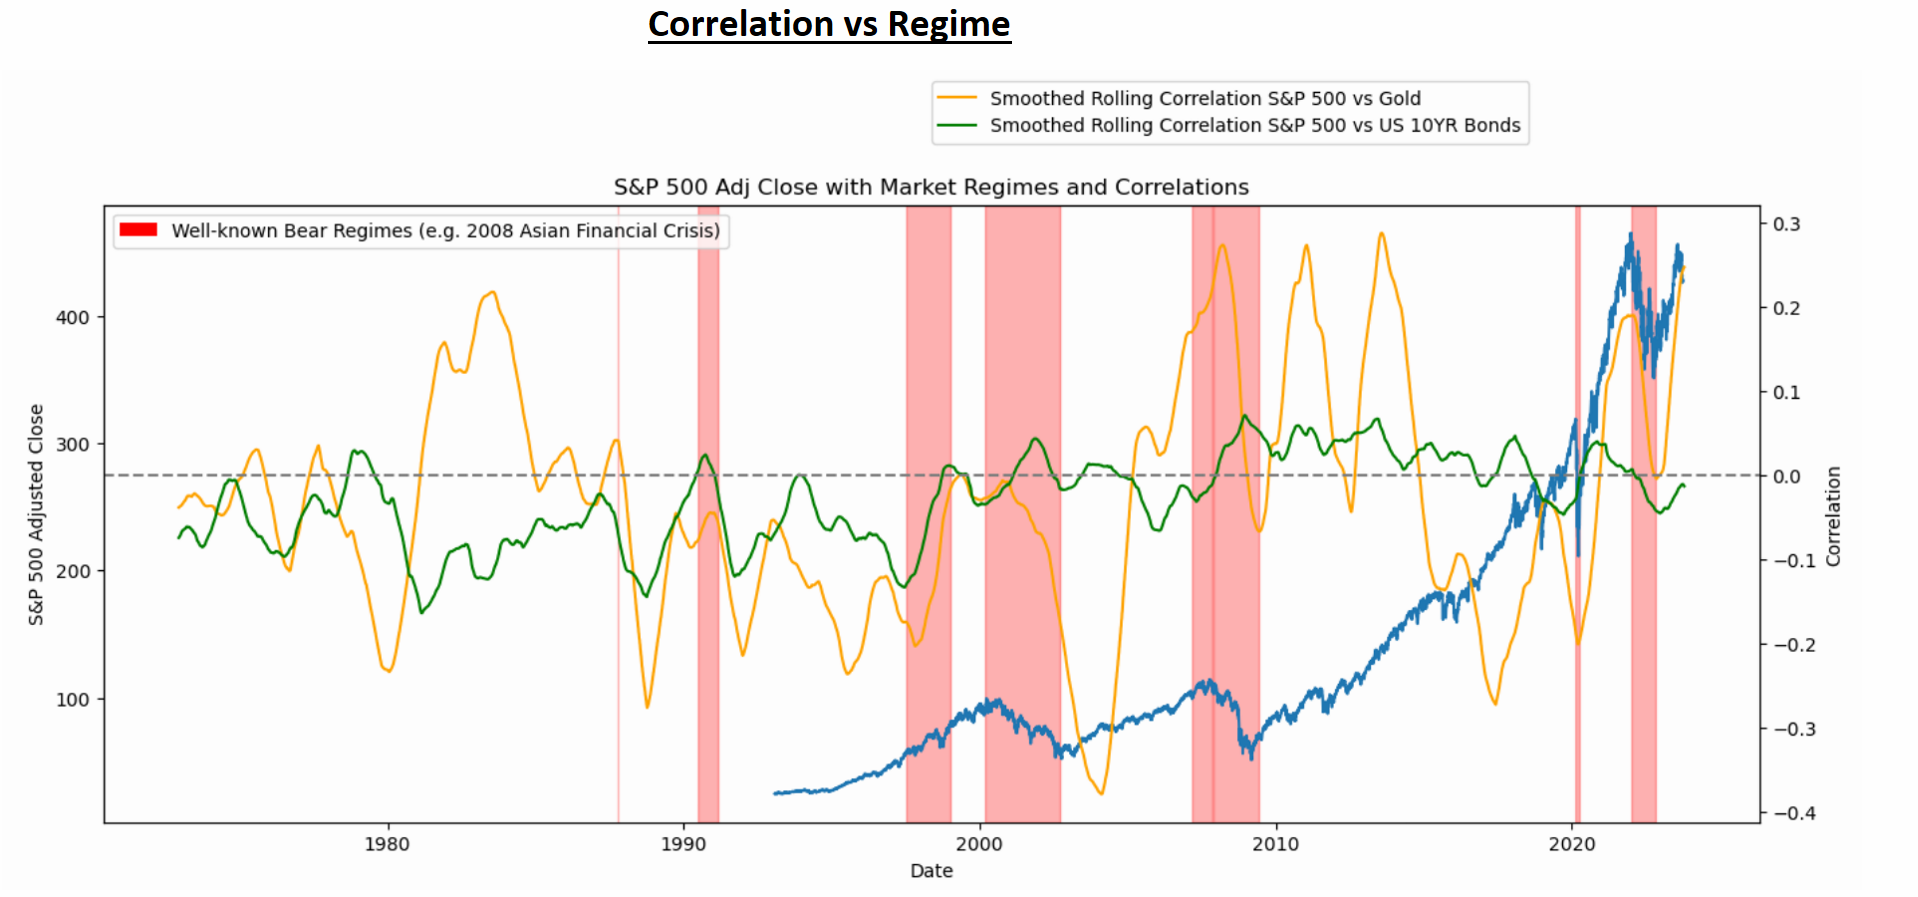
**Comments on the "Correlation vs Regime" graph above:** 
    - Before early 2000s, correlations were mostly negative. After early 2000s, there were more positive correlations. This aligns with a 4-regime model. This is because, before early 2000s, the market was in regimes 2 and 3. But after early 2000s, the market shifted to regimes 0 and 1. 
    - Today, the market is living in regime 0 and 1, with occassional regime 2. Its uncertain how long this situation will continue, perhaps soon the market will shift into regime 2 and 3. And this calls for a need to build an early-alarm system
    - Correlations are not always negative, this means direction of position of SP500, Gold and US10Y can be same or different
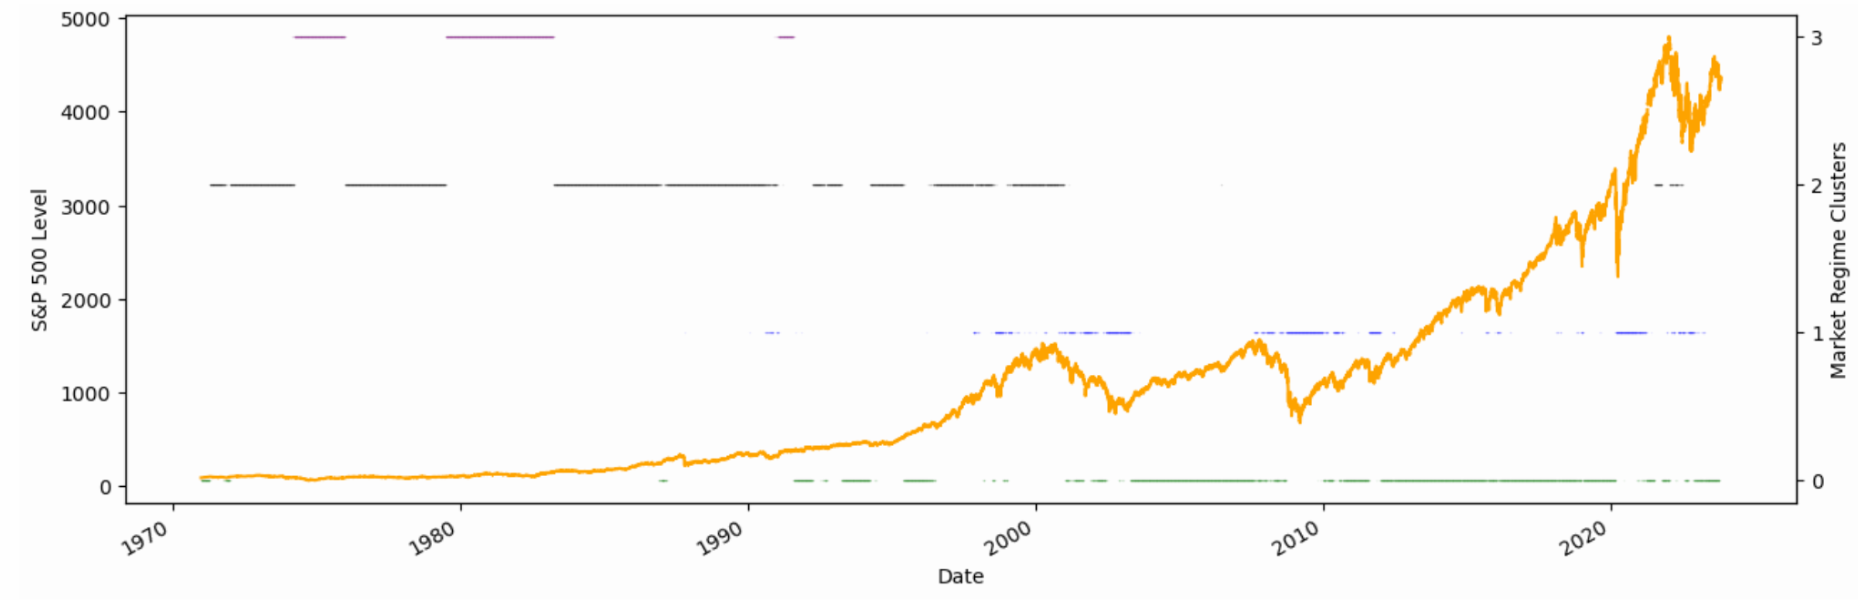

# Bear Regimes From Literature
<font color='red'>(Note) There are more literature for bear markets and causes. In contrasts, bull markets are stable and growing economy
- Black Monday (1987) (Strong Bear): sharpe stock market crash on October 19, 1987
- Early 1990s Recession (1990) (Weak Bear): Iraq's invasion of Kuwait and a subsequent increase in oil prices, drop in NASDAQ
- Dot-com Bubble (2000) (Strong Bear) : Technology bubble bursted around Mar 2000
- September 11 Attacks (2001) (Strong Bear) : 9/11 attacks causing global stock market to drop sharply
- Stock Market Downturn of 2002 (Strong Bear) : Post the recovery from the September 11 attacks, markets again declined significantly
- Chinese Stock Bubble (2007) (Weak Bear) : significant drop in the Shanghai Stock Exchange in early 2007 
- Financial Crisis of 2007–2008 (Strong Bear) 
- COVID-19 Stock Market Crash (2020) (Strong Bear)
- 2022 Stock Market Decline (Strong Bear) 

# Expectation
- Bull regime:
    - High GDP YOY
    - Low CPI YOY (economic growth without overheating)
    - High SP500 %c
    - Low Gold %c
    - Uncertain DXY
        - May increase due to FDI in US equities
        - May decrease due to capital outflow due to better global investment opportunites
    - Low US10Y rates (expansionary monetary policy)
    - Low Vix (investor confident)
- Bear regime
    - Low GDP YOY
    - High CPI YOY
    - Low SP500 %c (low corporate earning and investor pessimism)
    - High Gold %c (safe haven seeking)
    - Uncertain DXY
        - May increase due to protection seeking from US Treasuries
        - May decrease due to anticipated lower returns on dollar-demominated assets
    - High US10Y rates
        - Contractionary monetary policy
        - (Or) high yield to entice investors
        - But bear market may also see low rates as Fed may manually cut USS10Y rates in response to bear regime)
    - High Vix (fear)

# (Part 1) Data Preparation
<a id='1'></a>

In [806]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import pandas as pd
pd.set_option('display.max_rows', None)

import numpy as np

from tslearn.metrics import dtw

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from scipy.optimize import minimize

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import norm

import itertools

import matplotlib.patches as patches


In [505]:
df = 

In [888]:
df.head(2)

,GDP YOY,CPI YOY,S&P 500,Gold,USD Index Spot Rate,US 10YR Bonds,Vix
Date,,,,,,,
1970-12-31,-0.2,5.6,-0.010852,0.0,-0.000937,6.502,17.24
1971-01-04,-0.2,5.6,-0.010852,0.0,-0.000937,6.462,17.24


# Correlation v.s. Well-known Bear Regimes

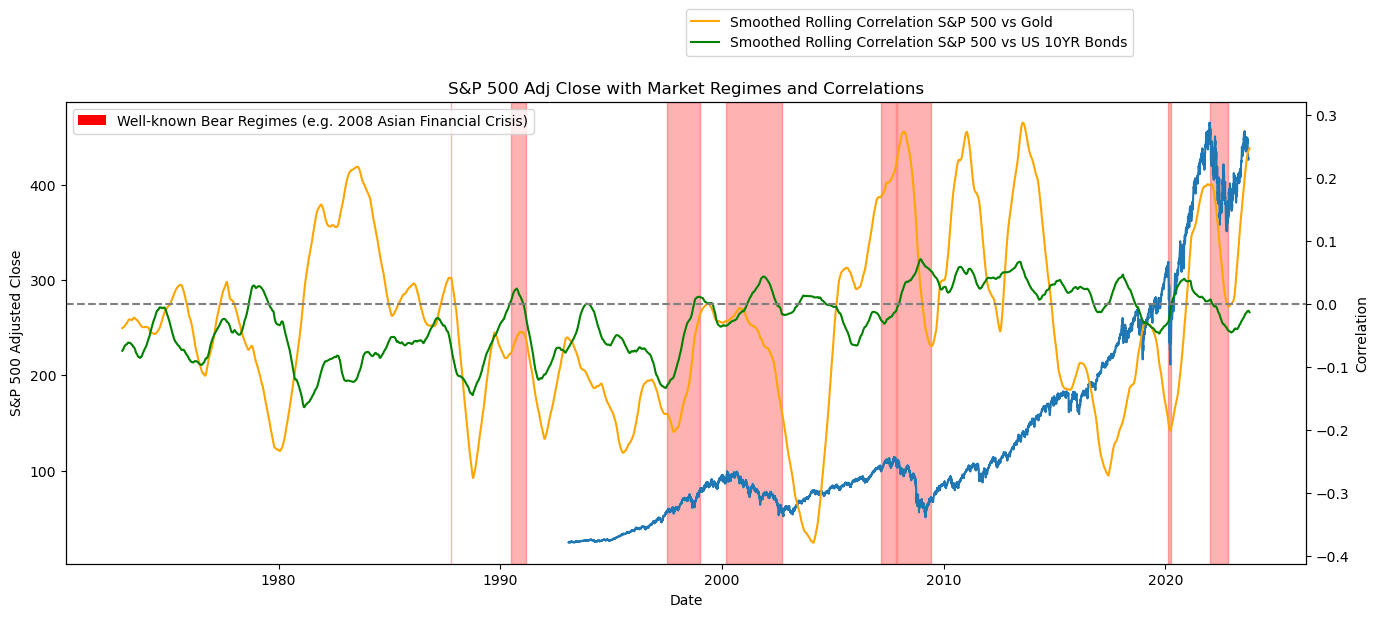

In [859]:
#####################################
########## Plot regime ##############
#####################################

fig, ax = plt.subplots(figsize=[16,6])
ax.plot(sp500['Adj Close'], label='S&P 500')

regimes = {
    'Bear': [
        ('1990-07-03', '1991-03-01'),  # Early 1990s Recession
        ('1997-07-01', '1999-01-01'),  # Asian Financial Crisis
        ('2007-02-27', '2007-11-01'),  # Chinese Stock Bubble
        ('1987-10-19', '1987-10-19'),  # Black Monday
        ('2000-03-10', '2002-09-24'),  # Dot-com Bubble and downturn of 2002
        ('2007-12-01', '2009-06-01'),  # Financial Crisis of 2007–2008
        ('2020-02-20', '2020-04-07'),  # COVID-19 Stock Market Crash
        ('2022-01-03', '2022-10-22')   # 2022 Stock Market Decline
    ]
}

# Define colors for each regime
colors = {
    'Bear': 'red'   
}

# Annotate each regime
# Annotate each regime
for regime, periods in regimes.items():
    for start, end in periods:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=colors[regime], alpha=0.3)

# Set up the legend for the regimes
legend_elements = [Patch(facecolor=colors['Bear'], label='Well-known Bear Regimes (e.g. 2008 Asian Financial Crisis)')]
ax.legend(handles=legend_elements, loc='upper left')

# Calculate the rolling correlations
rolling_correlation_sp500_gold = df1['S&P 500'].rolling(window=252).corr(df1['Gold'])
rolling_correlation_sp500_treasuries = df1['S&P 500'].rolling(window=252).corr(df1['US 10YR Bonds'])

# Apply a simple moving average (SMA) for smoothing
smoothed_rolling_corr_sp500_gold = rolling_correlation_sp500_gold.rolling(window=252).mean()
smoothed_rolling_corr_sp500_treasuries = rolling_correlation_sp500_treasuries.rolling(window=252).mean()

# Create a second y-axis for the correlation plot
ax2 = ax.twinx()

# Plot S&P 500 vs Gold smoothed correlation on the secondary y-axis
ax2.plot(smoothed_rolling_corr_sp500_gold.index, smoothed_rolling_corr_sp500_gold, 
         label='Smoothed Rolling Correlation S&P 500 vs Gold', color='orange')

# Plot S&P 500 vs US 10-Year Treasuries smoothed correlation on the secondary y-axis
ax2.plot(smoothed_rolling_corr_sp500_treasuries.index, smoothed_rolling_corr_sp500_treasuries, 
         label='Smoothed Rolling Correlation S&P 500 vs US 10YR Bonds', color='green')

# Add horizontal line at y=0 on the secondary y-axis
ax2.axhline(y=0, color='grey', linestyle='--')

# Legend for the correlations
ax2.legend(loc='upper left', bbox_to_anchor=(0, -0.1))

# Graph settings
plt.title('S&P 500 Adj Close with Market Regimes and Correlations')
ax.set_xlabel('Date')
ax.set_ylabel('S&P 500 Adjusted Close')
ax2.set_ylabel('Correlation')

plt.legend(loc=[0.5,1.1])

plt.show()

# (Part 2) Identify Regimes (K-Means Clustering)
<a id='2'></a>

- **(Initialization)** K-means is a clustering algorithm that aims to partition 'n' observations into 'k' clusters in which each data belongs to the nearest centroid
- **(Fitness)** Calculate average euclidean distance of each point to the nearest centroid
    - <font color='red'> (Note) Need normalisation of data as K-Means uses Euclidean distance to form clusters. Without normalization, features with larger scales can disproportionately influence the clustering outcome. 
- **(Repeat)** Find the number of k clusters that minimizes the inertia (lower inertia means the clusters are better separated)
    - Inertia = within-cluster variance

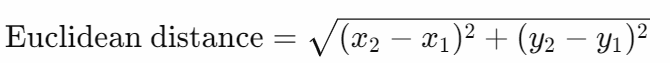
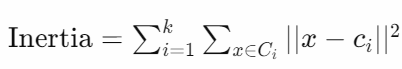

In [867]:
df1 = df.copy()
y = df[['S&P 500']]

regime_dict = {}

inertia_list = [] 
# sum of squared distances of each data to closest centroid (i.e. mean of a cluster)
# lower inertia is good, meaning clusters are well-separated

max_clusters = len(pd.unique(df.index.year)) # assume at most 1 regime change per year
x_scaled = StandardScaler().fit_transform(df1) # nromalizes data --> mean 0, std 1. Important as df columns are diff scales

x_scaled.columns = df1.columns
x_scaled.index = df1.index

for num_cluster in range(2, max_clusters + 1): 
    kmeans_model = KMeans(n_clusters=num_cluster, random_state=1)
    kmeans_model.fit(x_scaled)
    inertia_list.append(kmeans_model.inertia_)
    # Store cluster labels in the dictionary
    regime_dict[num_cluster] = kmeans_model.labels_

# Convert the dictionary to a DataFrame
regime_dict_df1 = pd.DataFrame(regime_dict, index=df1.index)

# Plot Number of Regimes vs Inertia

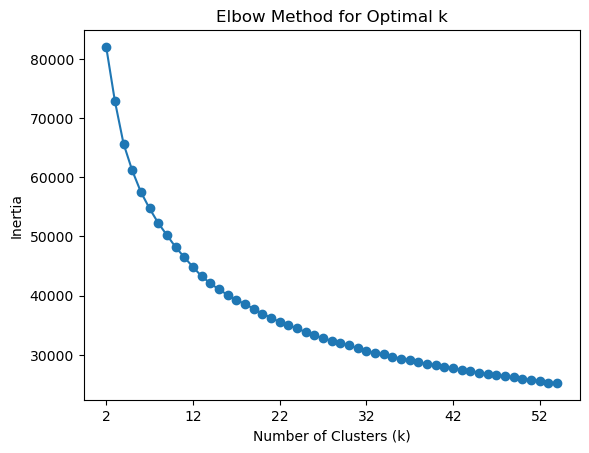

In [873]:
plt.plot(range(2, len(inertia_list) + 2), inertia_list, marker='o')

plt.xticks(np.arange(2, max_clusters + 1, 10))

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

It's expected that the decrease in inertia is less drastic as the number of regimes increases

# Identify Optimal Numer of Clusters
- Inertia decreases as number of clusters (k) increases, because the value added by adding the next regime decreases. Use second derivative of inertia to find the turning point where the value added is no longer justified

In [895]:
# Calculate the second derivative of the inertia values
second_derivative = np.gradient(np.gradient(inertia_list))

# Find the index of the maximum value in the second derivative
optimal_index = np.argmax(second_derivative)

# The optimal number of clusters is the index + 2 (since indexing starts from 0 and we start from k=2)
optimal_clusters1 = optimal_index + 2

print(f"The optimal number of regimes based on the elbow method is: {optimal_clusters1}")

The optimal number of regimes based on the elbow method is: 4


In [894]:
regime_dict_df1.head(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-12-31,0,1,1,1,5,5,0,8,1,6,1,7,7,1,10,7,3,1,7,15,16,15,20,2,18,5,17,23,1,29,21,30,2,22,23,14,10,14,8,34,10,23,32,11,29,46,16,42,33,32,8,32,36
1971-01-04,1,1,1,1,5,5,0,8,1,6,1,7,7,1,10,7,3,1,7,15,16,15,20,2,18,5,17,23,1,29,21,30,2,22,23,14,10,14,8,34,10,23,32,11,29,46,16,42,33,32,8,32,36


Column labelled '4' means there are 4 regimes. Each date falls under one of the four regimes, namely regime 0,1,2 or 3

In [876]:
regime_dict_df1[optimal_clusters1].value_counts()

4
1    5359
2    5237
0    1692
3    1588
Name: count, dtype: int64

In our data set, there are more days of regime 1 and 2, and fewer days of regime 0 and 3

# Plot 4 Regimes vs SP500

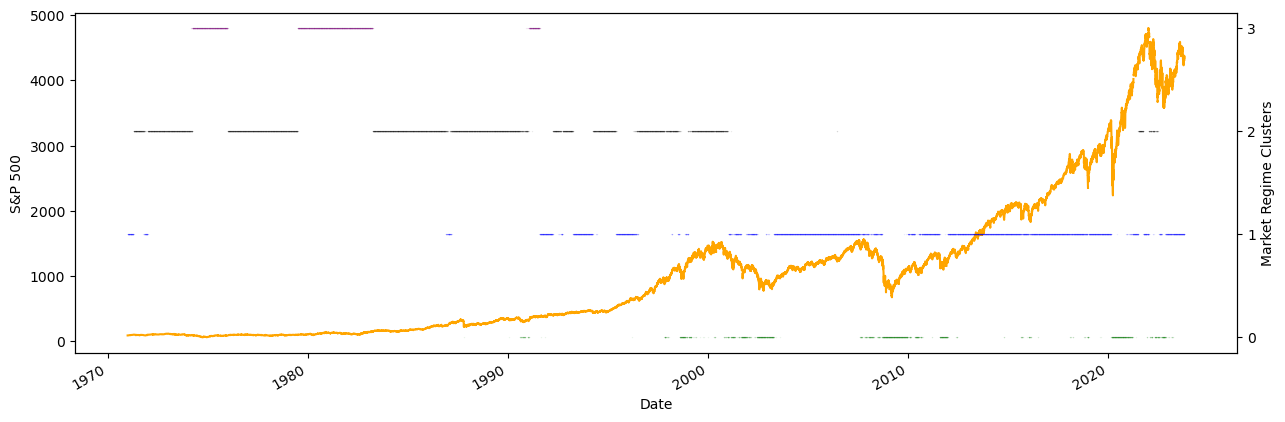

In [898]:
ax = sheet2['S&P 500'].plot(figsize=[15,5], label='S&P 500', color='orange')

scatter0 = regime_dict_df1[optimal_clusters1][regime_dict_df1[optimal_clusters1] == 0].plot(
    marker="^", 
    linestyle='none', 
    color="green",
    markersize=0.1,
    alpha=0.2,
    label="cluster label 0",
    secondary_y=True)

scatter1 = regime_dict_df1[optimal_clusters1][regime_dict_df1[optimal_clusters1] == 1].plot(
    marker="^", 
    linestyle='none', 
    color="blue",
    markersize=0.1,
    alpha=0.2,
    label="cluster label 1",
    secondary_y=True)

scatter2 = regime_dict_df1[optimal_clusters1][regime_dict_df1[optimal_clusters1] == 2].plot(
    marker="^", 
    linestyle='none', 
    color="black",
    markersize=0.1,
    alpha=0.2,
    label="cluster label 2",
    secondary_y=True)

scatter3 = regime_dict_df1[optimal_clusters1][regime_dict_df1[optimal_clusters1] == 3].plot(
    marker="^", 
    linestyle='none', 
    color="purple",
    markersize=0.1,
    alpha=0.2,
    label="cluster label 3",
    secondary_y=True)

ax.set_ylabel('S&P 500')

ax.right_ax.set_ylabel('Market Regime Clusters')

ax.right_ax.set_yticks(range(int(min(regime_dict_df1[optimal_clusters1])), 
                            int(max(regime_dict_df1[optimal_clusters1])) + 1))



Before early 2000s, the market was in regimes 2 and 3. After early 2000s, the market shifted to regimes 0 and 1

# For each of the 4 regimes, how did our data (e.g. GDP YOY, S&P 500) performed?

In [373]:
df1['Regime'] = regime_dict_df1[optimal_clusters1]

result = df1.groupby('Regime').agg({
    'GDP YOY': ['mean', 'median', ('25th percentile', lambda x: np.percentile(x, 25)), ('75th percentile', lambda x: np.percentile(x, 75))],
    'CPI YOY': ['mean', 'median', ('25th percentile', lambda x: np.percentile(x, 25)), ('75th percentile', lambda x: np.percentile(x, 75))],
    'S&P 500': ['mean', 'median', ('25th percentile', lambda x: np.percentile(x, 25)), ('75th percentile', lambda x: np.percentile(x, 75))],
    'Gold': ['mean', 'median', ('25th percentile', lambda x: np.percentile(x, 25)), ('75th percentile', lambda x: np.percentile(x, 75))],
    'USD Index Spot Rate': ['mean', 'median', ('25th percentile', lambda x: np.percentile(x, 25)), ('75th percentile', lambda x: np.percentile(x, 75))],
    'US 10YR Bonds': ['mean', 'median', ('25th percentile', lambda x: np.percentile(x, 25)), ('75th percentile', lambda x: np.percentile(x, 75))],
    'Vix': ['mean', 'median', ('25th percentile', lambda x: np.percentile(x, 25)), ('75th percentile', lambda x: np.percentile(x, 75))]
})

result

GDP YOY                                          CPI YOY         \
            mean median 25th percentile 75th percentile      mean median   
Regime                                                                     
0       0.718676    1.4            -1.1             2.1  2.360047    2.0   
1       2.389270    2.4             1.7             3.1  2.553797    2.4   
2       4.586404    4.3             3.7             5.2  4.292477    3.9   
3       0.111524   -0.2            -1.4             1.4  9.673615   10.3   

                                         S&P 500                            \
       25th percentile 75th percentile      mean    median 25th percentile   
Regime                                                                       
0                  1.2             3.5 -0.004061 -0.003113       -0.014639   
1                  1.7             3.1  0.001493  0.000771       -0.002401   
2                  2.9             5.2  0.000562  0.000112       -0.004114   
3                  7.1            12.1  0.000349  0.000000       -0.005849   

                            Gold                                            \
       75th percentile      mean    median 25th percentile 75th percentile   
Regime                                                                       
0             0.005427  0.000817  0.000636       -0.005311        0.007485   
1             0.005294  0.000242  0.000000       -0.004086        0.004789   
2             0.004999  0.000283  0.000000       -0.003542        0.003419   
3             0.006411  0.000516  0.000000       -0.007704        0.008129   

       USD Index Spot Rate                                            \
                      mean    median 25th percentile 75th percentile   
Regime                                                                 
0                -0.000018 -0.000071       -0.003363        0.003125   
1                 0.000014  0.000000       -0.002432        0.002509   
2                -0.000116  0.000000       -0.002258        0.002126   
3                 0.000381  0.000102       -0.002091        0.003037   

       US 10YR Bonds                                                  Vix  \
                mean    median 25th percentile 75th percentile       mean   
Regime                                                                      
0           3.403379   3.53445          2.2165         4.39950  31.394303   
1           3.710259   3.61930          2.3190         4.78545  15.895167   
2           7.746580   7.45200          6.5040         8.78000  18.017947   
3          10.594438  10.44200          8.0720        13.09200  17.348186   

                                                   
           median 25th percentile 75th percentile  
Regime                                             
0       29.040001          25.635       33.610001  
1       15.500000          12.925       18.309999  
2       17.240000          17.240       17.240000  
3       17.240000          17.240       17.240000

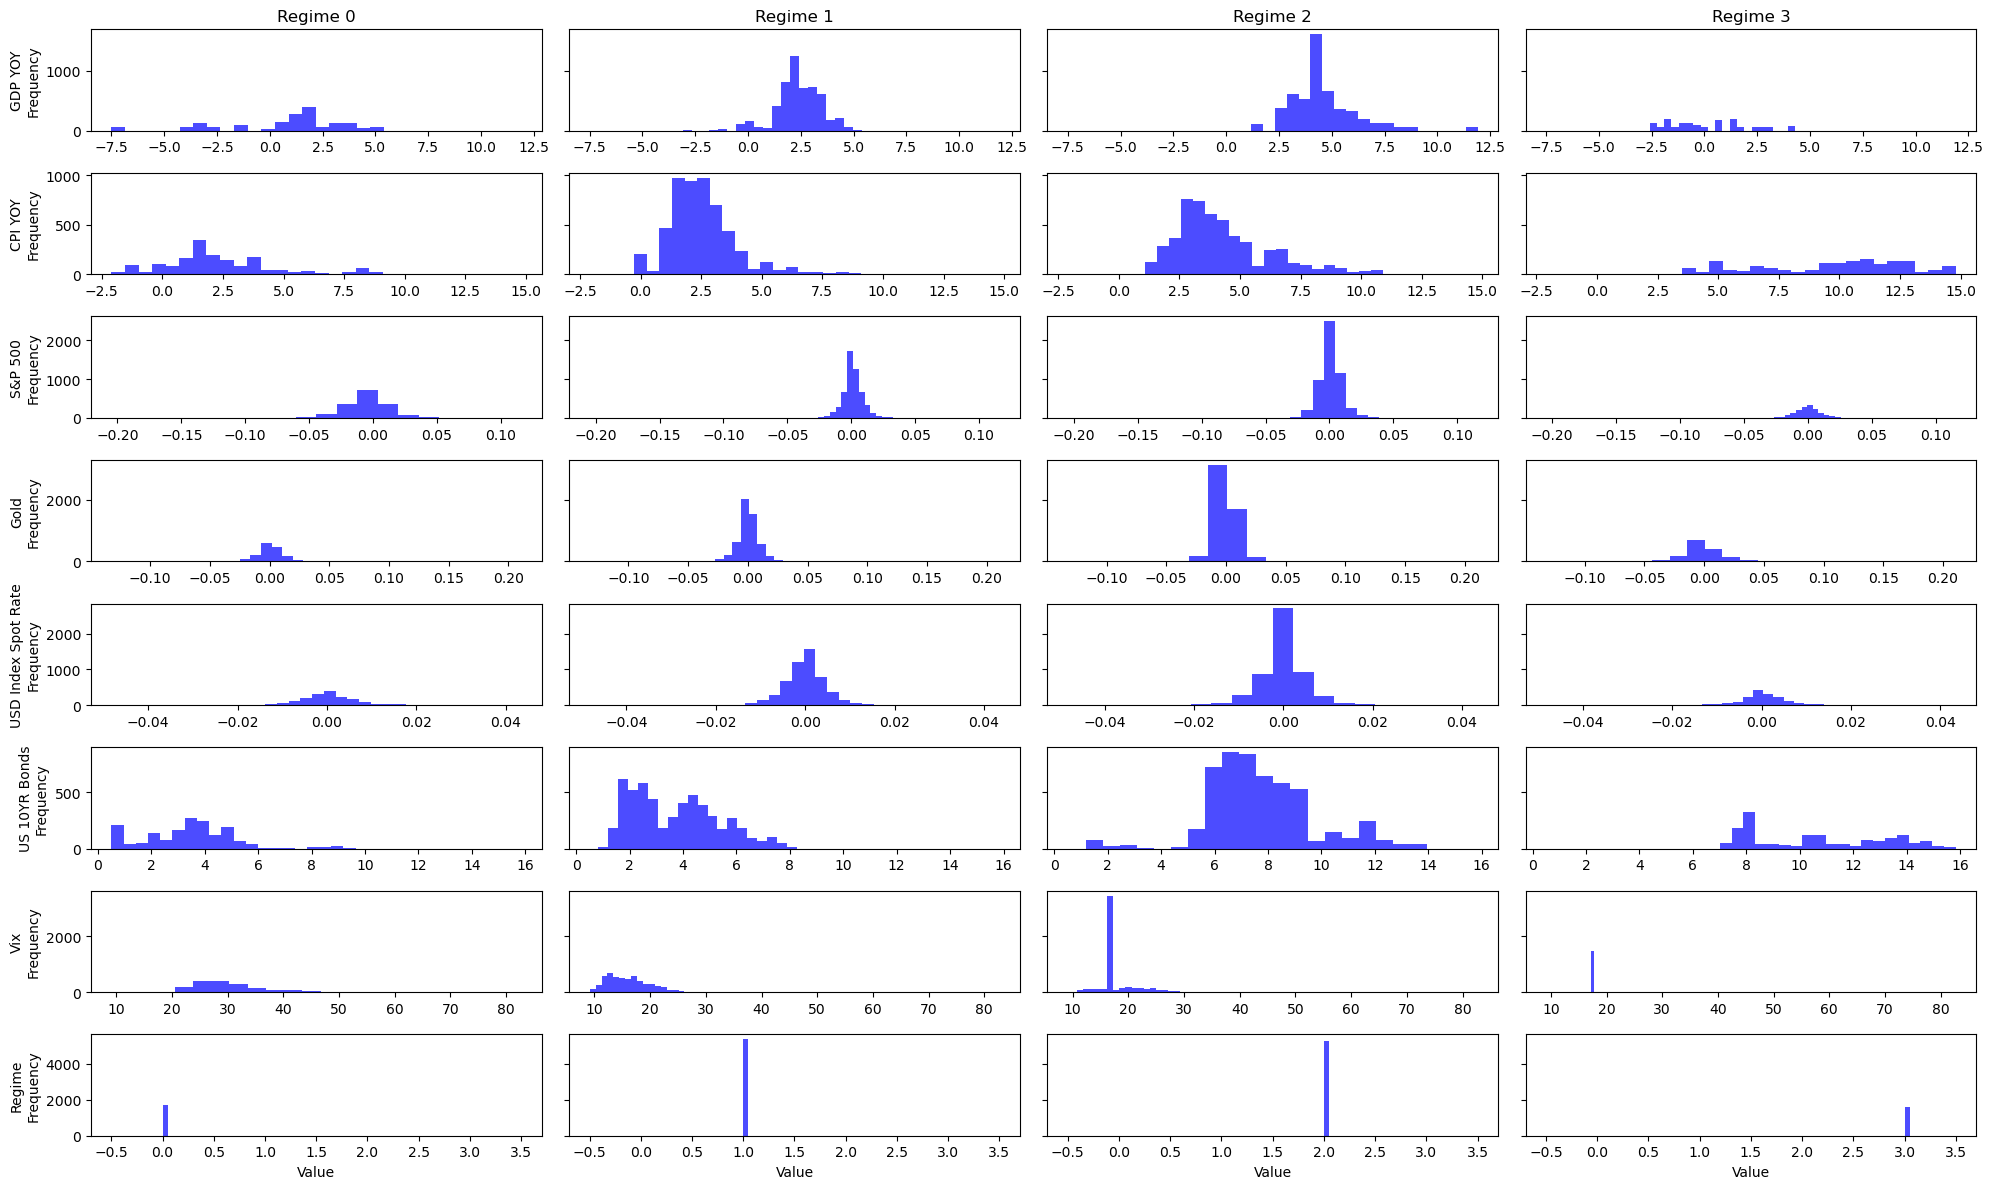

In [374]:
columns_to_plot = df1.columns
regimes = sorted(df1['Regime'].unique())

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=len(regimes), figsize=(20, 12), sharex='row', sharey='row')

# Plot histograms grouped by each variable across different regimes
for i, column in enumerate(columns_to_plot):
    for j, regime in enumerate(regimes):
        # Select the data for the current column and regime
        data = df1[df1['Regime'] == regime][column].dropna()
        # Plot histogram
        axes[i, j].hist(data, bins=20, color='blue', alpha=0.7)
        # Set title for the first row
        if i == 0:
            axes[i, j].set_title(f'Regime {regime}')
        # Set ylabel for the first column
        if j == 0:
            axes[i, j].set_ylabel(f'{column}\nFrequency')
        # Set xlabel for the last row
        if i == len(columns_to_plot) - 1:
            axes[i, j].set_xlabel('Value')

plt.tight_layout()
plt.show()

- K-Means clustering identified 4 regimes
    - **Regime 0 (Fear)** 
        - (Description) Strong bear, strong fear but moderate growth and inflation
        - (Possible actions) Short SP500, long Gold, long Treasuries
        - (Observation from data) Middle GDP YOY, low CPI YOY, negative SP500 pct_c, high Gold pct_c, negative DXY pct_c, low US10Y rate, high VIX
    - **Regime 1 (Recovery)**
        - (Description) Strong bull, optimistic
        - (Possible actions) Long SP500, short Gold, long Treasuries
        - (Observation from data) Middle GDP YOY, low CPI YOY, high SP500 pct_c, low Gold pct_c, mean 0 DXY pct_c, low US10Y rate, middle VIX
    - **Regime 2 (Bull Weakening)** 
        - (Possible actions) Long SP500, short Gold, long Treasuries 
        - (Observation from data) High GDP YOY, middle CPI YOY, middle SP500 pct_c, low Gold pct_c, negative DXY pct_c, middle US10Y rate, middle VIX
    - **Regime 3 (Bear Developing)** :
        - (Possible actions): 
            - short SP500,  long Gold
            - Short Treasuries if investors expect Fed to raise rates in face of high inflation
            - Long Treasuries if investors seek safe-haven amid economic slowdown
        - (Observation from data) low GDP YOY, high CPI YOY, middle SP500 pct_c, middle Gold pct_c, high DXY pct_c, high US10Y rate, middle VIX
- Explain relationship between market rates and bond prices
    - When rates is expected to increase, new treasuries have more attractive yields, and existing treasuries' prices decrease. Hence an increase in market rates will decrease prices of existing bonds

# Other Ideas
- Another method is to use random forest machine learning algorithm to identify regime shift

### What's Random Forest?
- a poplar ML model for classification
- a type of ensemble learning method, i.e. formed from combining predictions from multiple decision trees, hence improving accuracy and robustness (versatile in diff situations)
- Process:
    - Building each Decision Tree randomly: each decision tree in the forest is built from random sample of data. At each split in the decision tree, only a random subset of features (features refer to df1.columns, not df.index) is considered
    - Training of each decision tree: each decision tree to use their own random combinations of data and features to make predictions
    - Testing of random forest : random forest will feed data to all decision trees, the final prediction is a majority vote of all trees (i.e. which of the 4 regimes receive the most votes?)


###  Why Random Forecst is suitable in this case?
- Handle non-linear relationship (between SP500, Gold, Treasuries, GDP YOY, Market Regime etc)
    - Linear models (e.g. OLS, logistic regression) : not suitable for non-linear 
    - Neural Networks:Very good at capturing non-linearities, but require large datasets and careful tuning.
- Little hyperparameter tuning (number of decision trees and depth of each tree)
    - SVM : can work non-linear relationship but is time-consuming to choose the right kernel and kernel parameters (e.g. degree for polynomial kernel)
- Robustness to Overfitting:
    - Random Forest: Generally robust to overfitting, especially with many trees.
    - Linear Models: Less prone to overfitting but can underfit complex data.
    - SVM: Can overfit if the kernel and regularization parameters are not chosen carefully.
    - Neural Networks: Prone to overfitting, but techniques like dropout and early stopping can help.
- Feature Importance:
    - Random Forest: Provides direct insights into feature importance.
    - Linear Models: Coefficients can be interpreted as feature importance, but only in linear relationships.
    - SVM: Does not inherently provide feature importance.
    - Neural Networks: Feature importance is not directly interpretable due to the complexity of the model.
- Adaptability to Market Changes:
    - Random Forest: Adaptable due to the ensemble approach, but may need retraining with new data.
    - Linear Models: Less adaptable to changes and often need retraining.
    - SVM: Similar to linear models in terms of adaptability.
    - Neural Networks: Can be adaptable but often require retraining and fine-tuning.

# Mindmap of Machine Learning
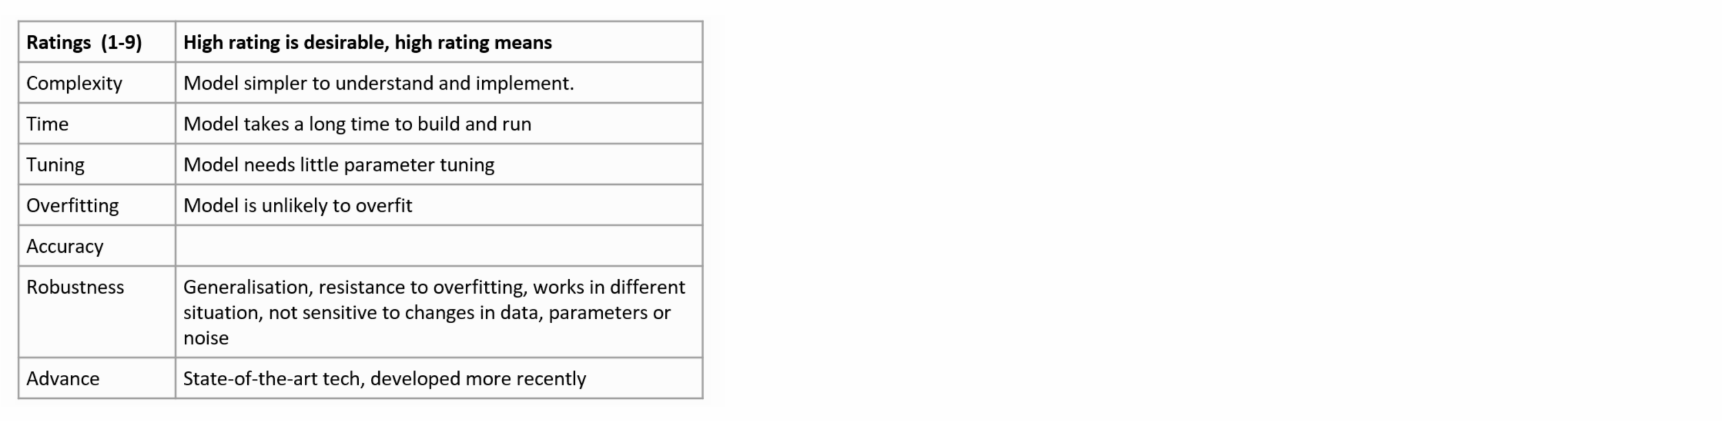
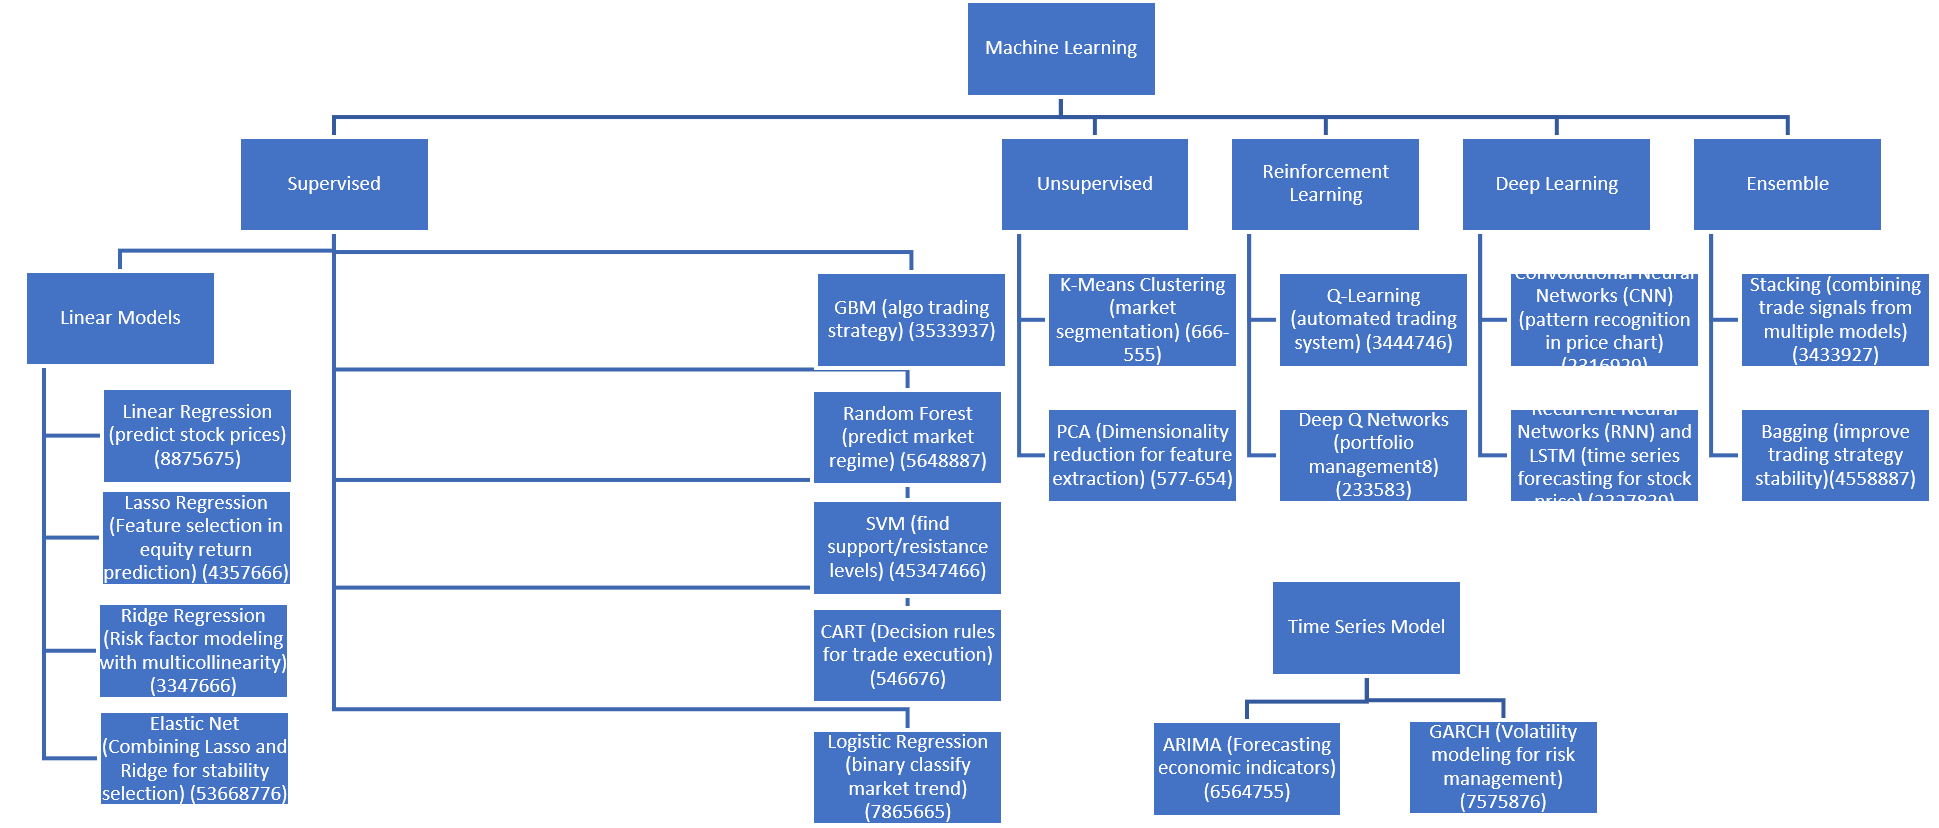

### Thank you for reading :)